In [2]:
import pandas as pd
import sys
sys.path.append("../src") 
import clean_data

# 1. Đọc file, tổng quan
# File phim được công chiếu trên toàn thế giới giai đoạn 2009 - 2023
df = clean_data.DocFile('../src/movies_2009_2023.csv')
df.head()



,id,title,release_date,vote_average,vote_count,popularity,original_language,budget,revenue,runtime,status
0,259872,Skin. Like. Sun.,10/10/2009,6.100,111,44.9920,fr,0,0,60,Released
1,19995,Avatar,12/15/2009,7.593,32629,27.0592,en,237000000,2923706026,162,Released
2,14836,Coraline,2/5/2009,7.899,8547,20.2430,en,60000000,185860104,100,Released
3,16869,Inglourious Basterds,8/2/2009,8.215,23231,17.5855,en,70000000,321457747,153,Released
4,767,Harry Potter and the Half-Blood Prince,7/15/2009,7.682,20139,18.5378,en,250000000,933959197,153,Released


In [10]:

# File phim được công chiếu tại VN giai đoạn 2009 - 2023
dfVN = clean_data.DocFile('../src/movies_vietnam_release.csv')
dfVN.head()

,id,title,release_date,vote_average,vote_count,popularity,original_language,budget,revenue,runtime,status
0,19995,Avatar,2009-12-15,7.593,32647,28.5946,en,237000000,2923706026,162,Released
1,767,Harry Potter and the Half-Blood Prince,2009-07-15,7.682,20149,18.6739,en,250000000,933959197,153,Released
2,16869,Inglourious Basterds,2009-08-02,8.215,23253,18.6160,en,70000000,321457747,153,Released
3,18785,The Hangover,2009-06-02,7.328,17509,18.1398,en,35000000,469310836,100,Released
4,18239,The Twilight Saga: New Moon,2009-11-18,6.000,9471,15.0847,en,50000000,709827462,131,Released


In [9]:
# Tổng quan phim trên thế giới
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 600 non-null    int64  
 1   title              600 non-null    object 
 2   release_date       600 non-null    object 
 3   vote_average       600 non-null    float64
 4   vote_count         600 non-null    int64  
 5   popularity         600 non-null    float64
 6   original_language  600 non-null    object 
 7   budget             600 non-null    int64  
 8   revenue            600 non-null    int64  
 9   runtime            600 non-null    int64  
 10  status             600 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 51.7+ KB


,id,vote_average,vote_count,popularity,budget,revenue,runtime
count,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02,6.000000e+02,600.000000
mean,3.593721e+05,6.686365,6379.650000,13.506734,6.710019e+07,2.844058e+08,108.258333
std,2.993840e+05,1.209511,7136.667853,10.850347,8.484540e+07,4.076573e+08,28.279518
min,1.890000e+02,0.000000,0.000000,6.108600,0.000000e+00,0.000000e+00,0.000000
25%,8.188750e+04,6.151500,109.000000,8.954825,0.000000e+00,0.000000e+00,92.000000
50%,3.241090e+05,6.800000,4305.500000,11.029450,2.800000e+07,9.975323e+07,106.500000
75%,5.296310e+05,7.416500,10055.750000,14.078850,1.100000e+08,4.146852e+08,124.000000
max,1.466016e+06,10.000000,37990.000000,161.015700,5.839000e+08,2.923706e+09,242.000000


1.1 Thông tin tổng quan:
   - Dataset có tổng cộng 600 phim với 11 cột thông tin
   - Kích thước Dataset tương đối nhỏ (~51.7 KB)
   - Các cột dữ liệu bao gồm:
     + Thông tin phim: id (mã phim)
                       title (Tiêu đề phim)
                       release_date (Ngày phát hành)
                       popularity (Mức độ phổ biến)
                       original_language (ngôn ngữ gốc)
                       runtime (Thời lượng phim) 
                       status (Trạng thái)
     + Tài chính: revenue (Doanh thu)
                  budget (Ngân sách/Vốn)
     + Đánh giá: vote_average (Điểm đánh giá trung bình)
                 vote_count (Tổng số lượt đánh giá)
1.2 Chất lượng dữ liệu
   - Dữ liệu thiếu (null/nan): Dataset hiện tại không có dữ liệu thiếu, nhưng vẫn còn chứa giá trị 0 (budget, revenue)
   - Vì chứa giá trị 0 nên dẫn đến sai sót trong quá trình phân tích
=> Cần làm sạch dữ liệu
1.3 Giá trị bất thường:
   - Budget và Revenue còn rất nhiều giá trị 0 (không hợp lý)
1.4 Thống kê chính
   - Điểm đánh giá trung bình (vote_average):
     + Có tổng cộng 600 lượt đánh giá
     + Trung bình mỗi phim được ~6.69 điểm.
     + 50% trong tổng số phim được điểm >=6.8 -> đa phần phim ở mức khá trở lên
   - Tổng số lượt đánh giá (vote_count):
     + Thấp nhất là 0 lượt và cao nhất là 37990 lượt -> Không có giới hạn của lượt đánh giá, nhưng có sự chênh lệch rất lớn giữa giá trị min và max -> ngoại lệ đã làm cho lượt đánh giá trung bình mỗi phim là ~6380
     + 50% trong tổng số phim có lượt đánh giá >4305.
   - Mức độ phổ biến (popularity):
     + Trung bình ~13.5
     + Max ~161 -> Phân bố lệch phải, một số ít phim rất hot
   - Ngân sách (budget)
     + Trung bình ~67 triệu USD
     + Max ~584 triệu
     + Nhiều phim có budget = 0
   - Doanh thu (revenue)
     + Trung binh ~284 triệu USD
     + Max ~2.9 tỷ USD
     + Nhiều phim có revenue = 0
   - Thời lượng (runtime)
     + Trung bình ~108 phút
     + Max ~242 phút
     + Có phim runtime = 0
1.5 Nhận xét
   - Dữ liệu lấy từ web khá sạch nhưng nhiều giá trị thiếu (ẩn dưới dạng 0)
   - Các cột budget và revenue có xu hướng lệch phải
   - Cột popularty phản ánh mức độ quan tâm theo thời điểm, phù hợp để phân tích theo trend nhưng dễ thay đổi theo ngày.

In [13]:
# Tổng quan phim tại Việt Nam
dfVN.info()
dfVN.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 286 non-null    int64  
 1   title              286 non-null    object 
 2   release_date       286 non-null    object 
 3   vote_average       286 non-null    float64
 4   vote_count         286 non-null    int64  
 5   popularity         286 non-null    float64
 6   original_language  286 non-null    object 
 7   budget             286 non-null    int64  
 8   revenue            286 non-null    int64  
 9   runtime            286 non-null    int64  
 10  status             286 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 24.7+ KB


,id,vote_average,vote_count,popularity,budget,revenue,runtime
count,2.860000e+02,286.000000,286.000000,286.00000,2.860000e+02,2.860000e+02,286.000000
mean,2.857929e+05,7.132850,11050.241259,13.70688,1.198474e+08,5.289382e+08,123.160839
std,2.448881e+05,0.668335,7108.744030,7.16880,8.829660e+07,4.543337e+08,23.171716
min,1.890000e+02,4.433000,340.000000,6.84160,0.000000e+00,0.000000e+00,82.000000
25%,6.909275e+04,6.639500,5904.000000,9.69405,4.725000e+07,2.170250e+08,105.000000
50%,2.600195e+05,7.234500,9226.000000,11.55790,1.025000e+08,4.043880e+08,120.500000
75%,4.386790e+05,7.597500,15665.500000,14.90775,1.750000e+08,7.583875e+08,136.000000
max,1.072790e+06,8.500000,38010.000000,64.21540,5.839000e+08,2.923706e+09,242.000000


In [ ]:
1. Thông tin tổng quan

- Dataset có 286 phim với 11 cột thông tin

- Kích thước Dataset nhỏ (~24.7 KB)

- Các cột dữ liệu bao gồm:

    + Thông tin phim:

        id (mã phim)
        
        title (Tiêu đề phim)
        
        release_date (Ngày phát hành)
        
        popularity (Mức độ phổ biến)
        
        original_language (Ngôn ngữ gốc)
        
        runtime (Thời lượng phim)
        
        status (Trạng thái phát hành)

    + Tài chính:

        budget (Ngân sách/Vốn sản xuất)
        
        revenue (Doanh thu)

    + Đánh giá:

        vote_average (Điểm trung bình)
        
        vote_count (Tổng số lượt đánh giá)

2. Chất lượng dữ liệu

- Không có giá trị thiếu (null/NaN)

- Tuy nhiên vẫn có nhiều giá trị 0 ở các cột budget, revenue (không hợp lý với thực tế)

- Những giá trị này cần được xử lý (ví dụ: loại bỏ, hoặc thay bằng trung vị/ước tính) để tránh sai lệch phân tích

3. Giá trị bất thường

- Cột budget và revenue có nhiều giá trị bằng 0 → bất thường vì phim chiếu rạp thực tế luôn có ngân sách & doanh thu

- Cột runtime không có giá trị 0, nhưng có một số phim thời lượng cao bất thường (max = 242 phút)

4. Thống kê chính

- Điểm đánh giá trung bình (vote_average)

    + Trung bình ~7.13 điểm
    
    + Thấp nhất 4.43, cao nhất 8.5
    
    + 50% số phim có điểm ≥ 7.23 → phần lớn phim được đánh giá ở mức khá trở lên

- Tổng số lượt đánh giá (vote_count)

    + Trung bình ~11,050 lượt
    
    + Chênh lệch rất lớn (từ thấp nhất 340 đến cao nhất ~38,010) → có phim rất nổi bật thu hút nhiều vote hơn hẳn

- Mức độ phổ biến (popularity)

    + Trung bình ~13.7
    
    + Max = 64.2 → phân bố lệch phải, chỉ một số ít phim có độ phổ biến vượt trội

- Ngân sách (budget)

    + Trung bình ~120 triệu USD
    
    + Max = 584 triệu
    
    + Nhiều phim có budget = 0 (không hợp lý)

- Doanh thu (revenue)

    + Trung bình ~529 triệu USD
    
    + Max = 2.9 tỷ
    
    + Nhiều phim revenue = 0

- Thời lượng (runtime)

    + Trung bình ~123 phút
    
    + Dao động từ 82 phút đến 242 phút
    
    + Tương đối hợp lý với phim chiếu rạp

5. Nhận xét

- Dataset phim chiếu tại Việt Nam có chất lượng khá tốt, không bị thiếu giá trị nhưng tồn tại nhiều giá trị 0 giả ở budget và revenue.

- Các biến tài chính (budget, revenue) và độ phổ biến (popularity) đều có phân bố lệch phải → một số ít phim cực kỳ thành công kéo trung bình lên cao.

- Thời lượng phim ổn định quanh mức 120 phút, phù hợp chuẩn chiếu rạp.

- Bộ dữ liệu này hoàn toàn đủ để phân tích mối quan hệ giữa yếu tố sản xuất (budget, original_language, popularity) và sự thành công (revenue, vote_average).

In [17]:
# Làm sạch dữ liệu
# Loại bỏ hoặc xử lý phim có budget = 0 hoặc revenue = 0 (vì sẽ gây méo phân tích).
df = df[(df['budget'] > 0) & (df['revenue'] > 0) & (df['runtime'] > 0)]

from descriptive_analysis import get_min, get_max, get_mean

# Trung bình, min, max của budget, revenue, runtime, popularity, vote_average
min_budget = get_min(df,'budget')
max_budget = get_max(df,'budget')
mean_budget = get_mean(df,'budget')

print(f"Ngân sách thấp nhất: {min_budget}")
print(f"Ngân sách cao nhất: {max_budget}")
print(f"Ngân sách trung bình: {mean_budget}")
print()

min_revenue = get_min(df,'revenue')
max_revenue = get_max(df,'revenue')
mean_revenue = get_mean(df,'revenue')

print(f"Doanh thu thấp nhất: {min_revenue}")
print(f"Doanh thu cao nhất: {max_revenue}")
print(f"Doanh thu trung bình: {mean_revenue}")
print()

min_runtime = get_min(df,'runtime')
max_runtime = get_max(df,'runtime')
mean_runtime = get_mean(df,'runtime')

print(f"Thời lượng thấp nhất: {min_runtime}")
print(f"Thời lượng cao nhất: {max_runtime}")
print(f"Thời lượng trung bình: {mean_runtime}")
print()

min_popularity = get_min(df,'popularity')
max_popularity = get_max(df,'popularity')
mean_popularity = get_mean(df,'popularity')

print(f"Độ phổ biến thấp nhất: {min_popularity}")
print(f"Độ phổ biến cao nhất: {max_popularity}")
print(f"Độ phổ biến trung bình: {mean_popularity}")
print()

min_vote_average = get_min(df,'vote_average')
max_vote_average = get_max(df,'vote_average')
mean_vote_average = get_mean(df,'vote_average')

print(f"Điểm đánh giá thấp nhất: {min_vote_average}")
print(f"Điểm đánh giá cao nhất: {max_vote_average}")
print(f"Điểm đánh giá trung bình: {mean_vote_average}")

Ngân sách thấp nhất: 22361
Ngân sách cao nhất: 583900000
Ngân sách trung bình: 107178573.55

Doanh thu thấp nhất: 3492
Doanh thu cao nhất: 2923706026
Doanh thu trung bình: 457017525.53

Thời lượng thấp nhất: 82
Thời lượng cao nhất: 206
Thời lượng trung bình: 119.37

Độ phổ biến thấp nhất: 6.292
Độ phổ biến cao nhất: 69.4581
Độ phổ biến trung bình: 12.36

Điểm đánh giá thấp nhất: 4.432
Điểm đánh giá cao nhất: 8.497
Điểm đánh giá trung bình: 7.04


In [27]:
# 2. Yếu tố ảnh hưởng đến thành công của phim
# 2.1 Ngôn ngữ gốc (original_language), ngân sách (budget) ảnh hưởng như thế nào đến doanh thu (revenue) và điểm đánh giá (vote_average).
# 2.1.1 Ngôn ngữ gốc (original_language) ảnh hưởng đến doanh thu (revenue) và điểm đánh giá (vote_average)

# Nhóm theo original_language → xem ngôn ngữ nào có revenue/vote cao hơn
revenue_byoriginal_language = df.groupby('original_language')['revenue'].max()
vote_byoriginal_language = df.groupby('original_language')['vote_average'].max()
print(f"Doanh thu nhóm theo ngôn ngữ: {revenue_byoriginal_language}")
print(f"Điểm đánh giá nhóm theo ngôn ngữ: {vote_byoriginal_language}")



Doanh thu nhóm theo ngôn ngữ: original_language
cn      87965942
en    2923706026
fi      14281199
fr     426590315
ja     523542183
ko     257591776
sv        393824
tl        721651
zh     742718496
Name: revenue, dtype: int64
Điểm đánh giá nhóm theo ngôn ngữ: original_language
cn    6.900
en    8.461
fi    7.400
fr    8.271
ja    8.200
ko    8.497
sv    6.304
tl    5.200
zh    7.900
Name: vote_average, dtype: float64


* Nhận xét: Từ kết quả của 2 biến "revenue_byoriginal_language" và "vote_byoriginal_language", ta có thể rút ra một số nhận xét như sau:
- Phim dùng ngôn ngữ English chiếm doanh thu cao nhất (~2.9 tỷ USD), cho thấy thị trường phim tiếng anh vẫn là thị trường chính, dễ tiếp cận đông đảo khán giả ở Việt Nam nói riêng, và khán giả toàn cầu nói chung.
- Tuy nhiên, điểm đánh giá cao nhất lại thuộc về Korean (~8.497 điểm), chứng tỏ ngoài thị trường quốc tế, phim hàn cũng được đánh giá cao về chất lượng.
- Các ngôn ngữ khác như French (fr ~8.27 điểm), Japanese (ja ~8.2 điểm) cũng có điểm số trung bình tốt, dù doanh thu toàn cầu thấp hơn so với English. Điều này gợi ý rằng phim châu Âu và châu Á thường có “chất lượng nội dung” cao, nhưng hạn chế về quy mô thị trường phát hành.
- Tagalog (tl) và Swedish (sv) có điểm đánh giá trung bình thấp (~5–6 điểm), đồng thời doanh thu cũng rất hạn chế
-> phản ánh quy mô thị trường nội địa nhỏ và sức hút quốc tế kém.
  Tóm lại:
  - Ngôn ngữ ảnh hưởng rõ rệt đến cả doanh thu và điểm đánh giá.
  - Tiếng Anh: lợi thế về quy mô khán giả, doanh thu áp đảo.
  - Hàn, Pháp, Nhật: chất lượng cao, được khán giả đánh giá tốt.
  - Các ngôn ngữ ít phổ biến: cả doanh tu và điểm đánh giá đều thấp, hạn chế trong cạnh tranh quốc tế.
    

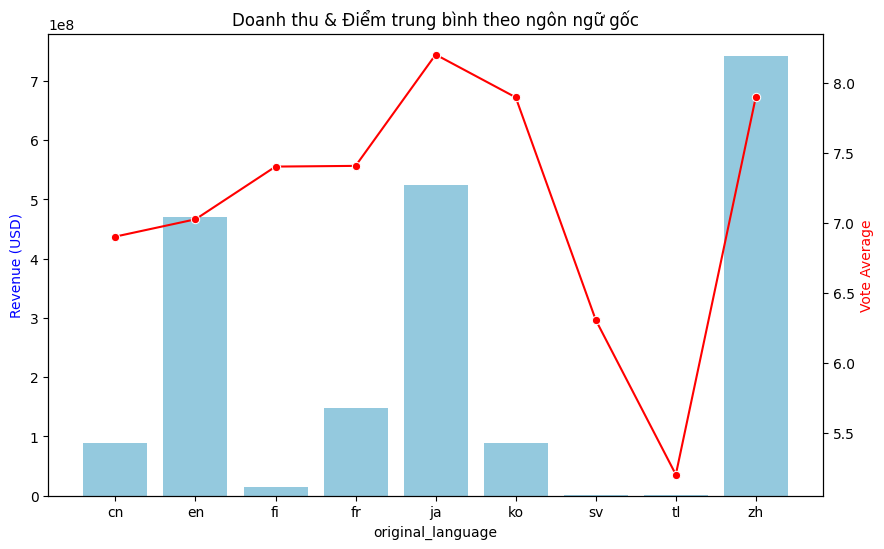

In [23]:

# Nhóm theo ngôn ngữ gốc và tính trung bình revenue, vote_average
lang_group = df.groupby("original_language")[["revenue","vote_average"]].mean().reset_index()

# Vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(10,6))

# Doanh thu
sns.barplot(data=lang_group, x="original_language", y="revenue", ax=ax1, color="skyblue")
ax1.set_ylabel("Revenue (USD)", color="blue")

# Thêm trục y thứ 2 cho vote_average
ax2 = ax1.twinx()
sns.lineplot(data=lang_group, x="original_language", y="vote_average", ax=ax2, color="red", marker="o")
ax2.set_ylabel("Vote Average", color="red")

plt.title("Doanh thu & Điểm trung bình theo ngôn ngữ gốc")
plt.show()



* Biểu đồ: Khi phân tích giá trị trung bình theo ngôn ngữ gốc (original_language), có một số điểm đáng chú ý như sau:
  - Ngôn ngữ Trung Quốc (zh) có doanh thu trung bình cao nhất, đạt khoảng 730 triệu USD, dù trước đó chỉ xếp thứ hai nếu xét theo giá trị doanh thu cao nhất. Điều này cho thấy các phim ngôn ngữ Trung được thị trường ưa chuộng, với hiệu suất trung bình rất tốt.
  - Ngôn ngữ Nhật Bản (ja) có điểm đánh giá trung bình cao nhất, khoảng 8.2 điểm, thể hiện sự yêu thích và đánh giá tích cực từ khán giả. Đồng thời, doanh thu trung bình (~530 triệu USD) cũng rất ấn tượng, cho thấy sự đồng thuận giữa chất lượng và thị trường.
  - Ngôn ngữ Anh (en) duy trì sự cân bằng giữa doanh thu (~480 triệu USD) và điểm đánh giá (~7.0 điểm). Điều này cho thấy các bộ phim tiếng Anh có chất lượng ổn định và được khán giả Việt Nam đón nhận tích cực.
  - Một số ngôn ngữ như Phần Lan (fi), Trung Quốc (cn) và Hàn Quốc (ko) có điểm đánh giá trung bình khá cao (~6.9 - 7.9 điểm) nhưng doanh thu lại thấp hơn đáng kể. Điều này cho thấy có thể các phim này được đánh giá tốt nhưng chưa tiếp cận được đông đảo khán giả, hoặc có hạn chế trong khâu phát hành/marketing.
  - Ngôn ngữ Thụy Điển (sv) có điểm đánh giá trung bình ở mức khá (~6.3 điểm) nhưng doanh thu trung bình gần như không đáng kể, cho thấy mức độ phổ biến và phân phối phim còn hạn chế.
  - Ngôn ngữ Thái Lan (tl) có mức doanh thu và điểm đánh giá đều thấp, cho thấy các bộ phim tiếng Thái có thể chưa tạo được dấu ấn lớn tại thị trường.
  

In [25]:
# 2.1.2 Ngân sách (Budget) ảnh hưởng đến doanh thu (revenue) và điểm đánh giá (vote_average)
# Nhóm theo ngân sách → xem ngôn ngữ nào có revenue/vote cao hơn
revenue_bybudget = df.groupby('budget')['revenue'].max()
vote_bybudget = df.groupby('budget')['vote_average'].max()
print(f"Doanh thu nhóm theo ngân sách: {revenue_bybudget}")
print(f"Điểm đánh giá nhóm theo ngân sách: {vote_bybudget}")



Doanh thu nhóm theo ngân sách: budget
22361            721651
35000            421798
200000            11575
1000000        15113105
1500000       100106454
                ...    
356000000    2799439100
365000000    1405403694
379000000    1046721266
416000000    1074144248
583900000    1004004592
Name: revenue, Length: 134, dtype: int64
Điểm đánh giá nhóm theo ngân sách: budget
22361        5.200
35000        6.345
200000       5.600
1000000      6.741
1500000      6.942
             ...  
356000000    8.238
365000000    7.271
379000000    6.562
416000000    6.283
583900000    6.634
Name: vote_average, Length: 134, dtype: float64


C:\Users\PC\AppData\Local\Temp\ipykernel_15080\2235486020.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget_group = df.groupby("budget_bin")[["revenue","vote_average"]].mean().reset_index()


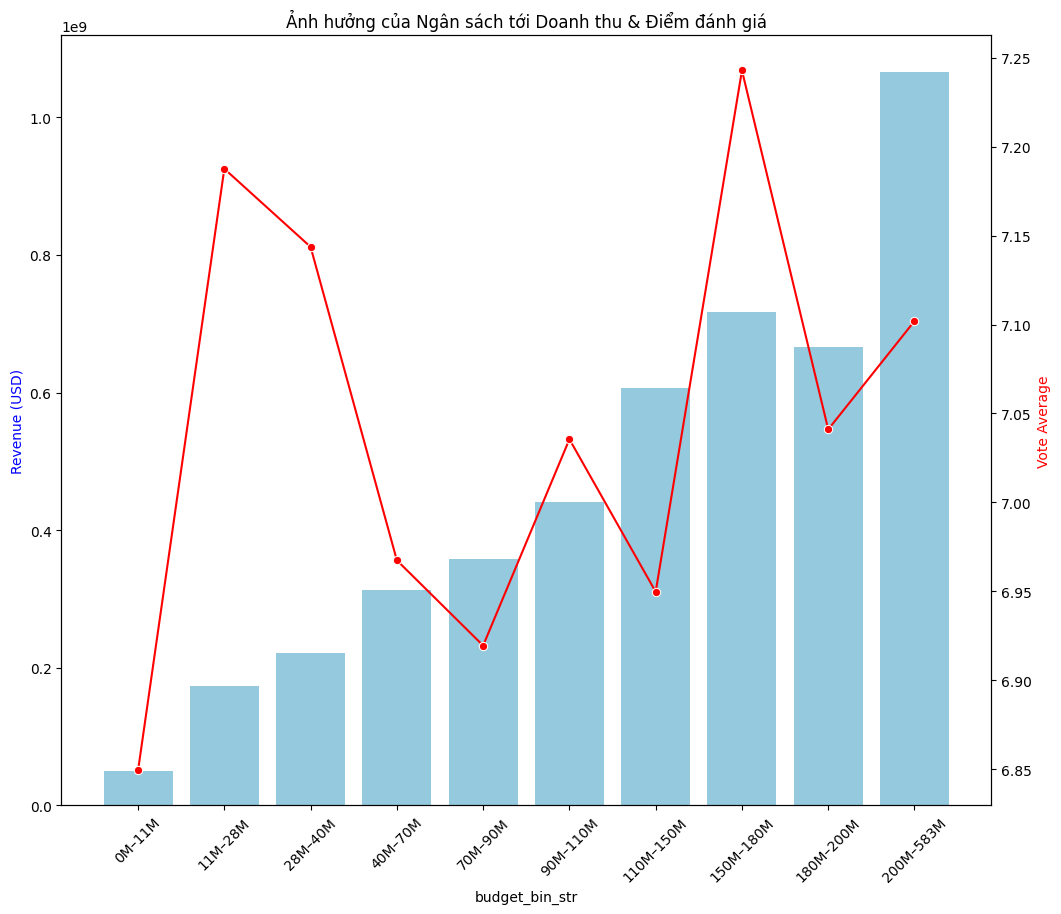

In [34]:

# Nhóm theo ngân sách và tính trung bình revenue, vote_average
# Chia ngân sách thành 10 nhóm (bins)
df["budget_bin"] = pd.qcut(df["budget"], q=10, duplicates="drop")

# Nhóm theo bin
budget_group = df.groupby("budget_bin")[["revenue","vote_average"]].mean().reset_index()
# Rút gọn biểu diễn của Interval thành chuỗi tóm tắt
def simplify_interval(interval):
    return f"{int(interval.left/1e6)}M–{int(interval.right/1e6)}M"

budget_group["budget_bin_str"] = budget_group["budget_bin"].apply(simplify_interval)

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12,10))

# Revenue (cột xanh)
sns.barplot(data=budget_group, x="budget_bin_str", y="revenue", ax=ax1, color="skyblue")
ax1.set_ylabel("Revenue (USD)", color="blue")
ax1.tick_params(axis="x", rotation=45)

# Vote Average (đường đỏ)
ax2 = ax1.twinx()
sns.lineplot(data=budget_group, x="budget_bin_str", y="vote_average", ax=ax2, color="red", marker="o")
ax2.set_ylabel("Vote Average", color="red")

plt.title("Ảnh hưởng của Ngân sách tới Doanh thu & Điểm đánh giá")
plt.xlabel("Budget Bins")
plt.show()



* Nhận xét: Từ biểu đồ "Ảnh hưởng của ngân sách tới doanh thu và điểm đánh giá", ta rút ra được một số nhận xét sau:
  - Doanh thu cao nhất (~1 tỷ USD) thuộc vào nhóm ngân sách từ 200 đến hơn 500 triệu USD, cho thấy sự đầu tư lớn về tài chính có thể giúp mở rộng phạm vi phát hành, quảng bá, và thu hút khán giả.
  - Xu hướng tổng thể cho thấy: khi ngân sách đầu tư tăng, doanh thu trung bình cũng tăng theo. Tuy không phải mọi nhóm đều tuân theo quy luật này tuyệt đối, nhưng phần lớn các nhóm có ngân sách cao đều đạt mức doanh thu vượt trội so với các nhóm ngân sách thấp.
  - Tuy nhiên, ngân sách cao không đồng nghĩa với điểm đánh giá cao. Nhóm có điểm đánh giá trung bình cao nhất lại không thuộc về nhóm ngân sách cao nhất, mà rơi vào các nhóm ngân sách trung bình hoặc thậm chí thấp hơn (ví dụ: khoảng 11-28 triệu USD. Điều này cho thấy:
    + Chất lượng nội dung không hoàn toàn phụ thuộc vào ngân sách đầu tư
    + Những phim có ngân sách thấp vẫn có thể gây ấn tượng với khán giả, có thể nhờ vào cột truyện hấp dẫn, tiêu đề gây chú ý, diễn xuất tốt, hoặc thông điệp ý nghĩa.
    

**2.2 Phân tích mối quan hệ giữa các yếu tố và thành công phim**
**Mục tiêu:**  
Tìm hiểu mối quan hệ giữa:
- **Ngân sách (budget)**  
- **Doanh thu (revenue)**  
- **Mức độ phổ biến (popularity)**  
- **Điểm đánh giá trung bình (vote_average)**  
- **Số lượng đánh giá (vote_count)**  

**Công việc cần thực hiện:**  
- Vẽ biểu đồ phân tán (scatter plots) để so sánh từng cặp biến với revenue và vote_average.  
- Tính hệ số tương quan (correlation matrix) giữa các biến.  
- Nhận xét: biến nào có quan hệ mạnh nhất đến doanh thu, biến nào ảnh hưởng nhiều đến điểm đánh giá.  
- So sánh sự khác biệt giữa phim toàn cầu và phim phát hành tại Việt Nam.

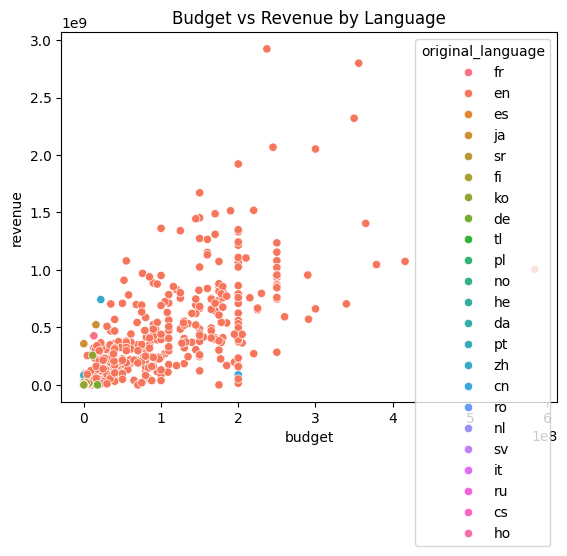

In [15]:
# 2.2.1 Vẽ biểu đồ phân tán (scatter plots) để so sánh từng cặp biến với revenue và vote_average.  
from visualization import group_and_plot

# a. Với revenue (Y-axis)
# budget vs revenue
group_and_plot(df, group_col="original_language", 
               value_cols=["budget", "revenue"], 
               kind="scatter", 
               title="Budget vs Revenue by Language")


**Nhận xét Buget và Revenue**
- Biểu đồ phân tán có xu hướng lệch phải, phần lớn các phim tập trung ở vùng ngân sách thấp và doanh thu trung bình, trong khi số lượng phim có ngân sách và doanh thu rất cao là khá ít và phân bố rải rác.
- Phim có ngôn ngữ gốc là tiếng Anh (English) chiếm đa số và trải đều trên toàn bộ dải ngân sách và doanh thu, cho thấy đây là nhóm phim phổ biến, đa dạng về quy mô đầu tư và hiệu suất tài chính.
- Có những trường hợp phim đầu tư rất lớn (ví dụ trên 400 triệu USD) nhưng chỉ đạt doanh thu khoảng 1 tỷ USD, trong khi đó một số phim với ngân sách khoảng 250 triệu USD lại đạt doanh thu lên đến 2.9 tỷ USD. Điều này cho thấy rằng ngân sách đầu tư lớn không đảm bảo thành công về mặt doanh thu.
- Doanh thu của một bộ phim có thể bị ảnh hưởng bởi nhiều yếu tố khác ngoài ngân sách, chẳng hạn như: nội dung, chiến lược marketing, thời điểm phát hành, sức hút thương hiệu, phản hồi của khán giả, v.v.

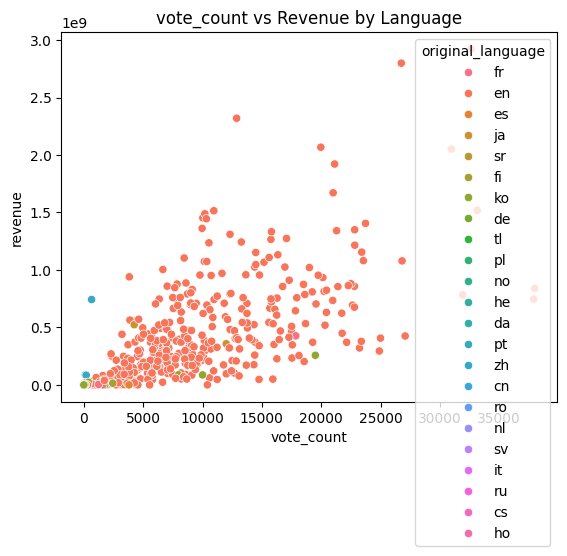

In [17]:
# vote_count vs revenue
group_and_plot(df, group_col="original_language", 
               value_cols=["vote_count", "revenue"], 
               kind="scatter", 
               title="vote_count vs Revenue by Language")


**Nhận xét: vote_count và Revenue**
- Bản đồ phân tán cho thấy dữ liệu có xu hướng khá lệch phải, phần lớn phim có số lượt đánh giá rất ít, trong khi số lượng phim có lượt đánh giá và doanh thu rất cao là khá ít và phân bố khá rải rác.
- Phim có ngôn ngữ gốc là tiếng Anh (English) chiếm đa số và trải đều trên toàn bộ dải đánh giá và doanh thu, cho thấy đây là nhóm phim phổ biến, được bạn bè quốc tế ủng hộ khá nhiệt tình, đồng thời cũng là nhóm phim mang lại doanh thu cao nhất trên toàn thế giới.
- Có những trường hợp tuy nhận được rất nhiều lượt đánh giá (25000+ lượt đánh giá) nhưng chỉ đạt doanh thu chưa đến 500 triệu USD, trong khi có một số phim với lượt đánh giá tầm khá (từ 10000 đến 11000+) lại đạt doanh thu ~1.5 tỷ USD, đặc biệt nhất là một bộ phim English chỉ có khoảng 13000 lượt đánh giá nhưng doanh thu lại đạt ngưỡng 2.3 tỷ USD. Điều này cho thấy rằng, lượt đánh giá từ người xem không đảm bảo sự thành công của một bộ phim về mặt doanh thu.
- Doanh thu của một bộ phim có thể bị ảnh hưởng bởi nhiều yếu tố khác ngoài ngân sách, chẳng hạn như: nội dung, chiến lược marketing, thời điểm phát hành, sức hút thương hiệu, thời lượng,...

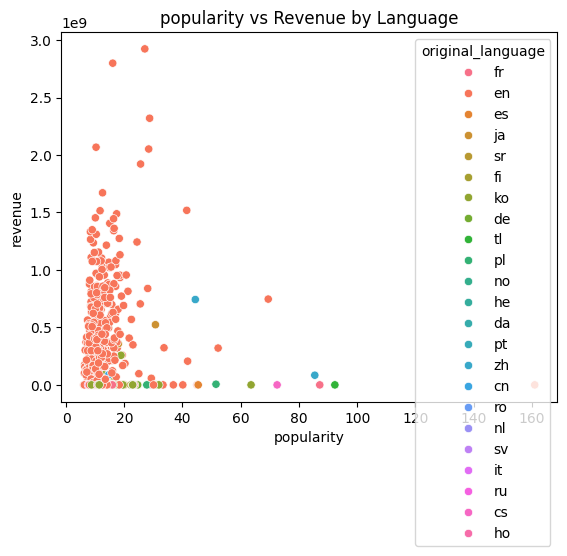

In [18]:
# popularity vs revenue
group_and_plot(df, group_col="original_language", 
               value_cols=["popularity", "revenue"], 
               kind="scatter", 
               title="popularity vs Revenue by Language")

**Nhận xét: popularity và Revenue**
- Phần lớn các bộ phim có mức độ phổ biến (popularity) dưới 40, và doanh thu (revenue) cũng chủ yếu nằm dưới 500 triệu USD. Dữ liệu có xu hướng lệch phải, cho thấy chỉ một số ít phim đạt mức phổ biến hoặc doanh thu cực kỳ cao.
- Phim có ngôn ngữ gốc là tiếng Anh (en) chiếm đa số và trải dài trên cả hai trục, cho thấy mức độ hiện diện và ảnh hưởng mạnh mẽ của phim nói tiếng Anh trong ngành công nghiệp điện ảnh toàn cầu.
- Một số ngôn ngữ khác như tl (Tagalog), cn (Chinese), ru (Russian) xuất hiện trong tập dữ liệu nhưng tập trung ở vùng doanh thu thấp, cho thấy các phim thuộc nhóm ngôn ngữ này dù có thể phổ biến trong khu vực, nhưng khó đạt doanh thu cao trên thị trường quốc tế.
- Đáng chú ý, bộ phim có doanh thu cao nhất (gần 3 tỷ USD) không phải là phim có mức độ phổ biến nhất. Ngược lại, một phim có popularity trên 100 lại không đạt doanh thu tương xứng. Điều này cho thấy rằng mức độ phổ biến không tỷ lệ thuận tuyệt đối với doanh thu, và doanh thu còn phụ thuộc vào nhiều yếu tố khác như thị trường phát hành, marketing, thương hiệu, hoặc yếu tố thời điểm.

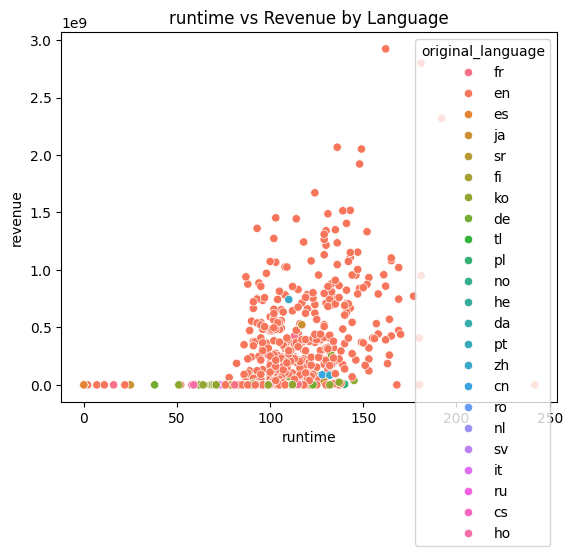

In [19]:
# runtime vs revenue
group_and_plot(df, group_col="original_language", 
               value_cols=["runtime", "revenue"], 
               kind="scatter", 
               title="runtime vs Revenue by Language")

**Nhận xét: runtime và Revenue**
- Phần lớn các bộ phim trong dữ liệu có thời lượng từ 85 đến 145 phút, và doanh thu tập trung chủ yếu trong khoảng 100 triệu đến 500 triệu USD. Đây được xem là "khoảng an toàn" về cả thời lượng lẫn doanh thu trong ngành điện ảnh.
- Dữ liệu có xu hướng tập trung ở giữa và rải rác ở hai đầu, cho thấy chỉ có một số ít phim có thời lượng rất ngắn (< 30 phút) hoặc rất dài (> 170 phút), và cũng chỉ một vài phim đạt doanh thu cực cao.
- Các phim có thời lượng quá ngắn (dưới 25 phút) hầu như không đạt doanh thu cao — điều này phản ánh đặc điểm của phim ngắn, thường không phát hành rộng rãi tại rạp hoặc không thuộc dòng phim thương mại.
- Trong khi đó, nhiều bộ phim có thời lượng từ 100 đến 150 phút lại đạt doanh thu cao hơn rõ rệt. Tuy nhiên, vẫn tồn tại những phim có thời lượng dài (trên 170 phút, thậm chí gần 240 phút) nhưng doanh thu lại tương đối thấp (~100 triệu USD). Ngược lại, một số phim khoảng 150 phút lại mang về doanh thu gần 2 tỷ USD.
- Nhìn chung, thời lượng phim có ảnh hưởng nhất định đến doanh thu, nhưng không phải là yếu tố quyết định duy nhất. Các yếu tố khác như nội dung, thương hiệu, thời điểm phát hành, chiến lược marketing và thị trường mục tiêu đóng vai trò quan trọng trong việc tạo ra thành công tài chính cho một bộ phim.

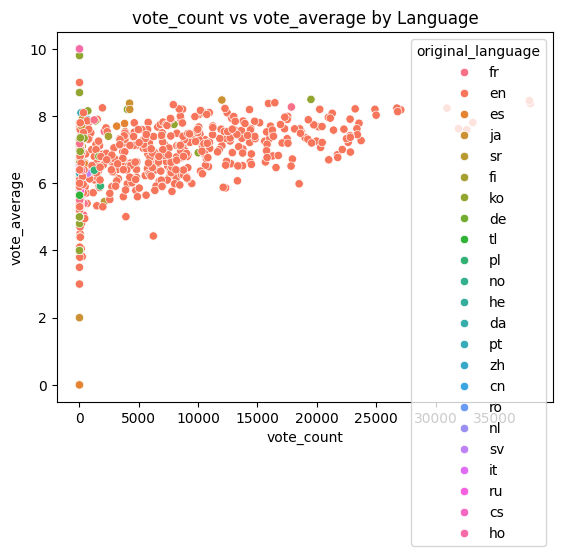

In [20]:
# b. Với vote_average (Y-axis)
# vote_count vs vote_average
group_and_plot(df, group_col="original_language", 
               value_cols=["vote_count", "vote_average"], 
               kind="scatter", 
               title="vote_count vs vote_average by Language")

**Nhận xét vote_count và vote_average**
- Phần lớn các bộ phim có tổng số lượt đánh giá (vote_count) dưới 10000, cho thấy chỉ số ít phim nhận được sự quan tâm rộng rãi từ khán giả toàn cầu.
- Các phim có số điểm trung bình dao động từ 6 đến 8, và xu hướng điểm nhìn chung tăng nhẹ theo số lượng đánh giá, tuy nhiên sự gia tăng này khôgn đáng kể, cho thấy số lượng đánh giá nhiều không đảm bảo số điểm cao hơn.
- Một số bộ phim có số lượt đánh giá rất thấp (gần như dưới 500 đánh giá) nhưng lại mang lại số điểm rất cao (từ 8.5 đến 10 điểm), điều này cho thấy các đánh giá này có thể đến từ nhóm khán giả hẹp, có khả năng thiên lệch hoặc chưa phản ánh đúng chất lượng phim trên diện rộng.
- Những phim có tổng lượt đánh giá vượt trội (từ 20000 đế 30000) hầu hết là phim có ngôn ngữ gốc là tiếng Anh, cho thấy mức độ phổ biến và tiếp cận rộng rãi của dòng phim Hollywood và các thị trường sử dụng tiếng Anh.
- Một số phim thuộc các ngôn ngữ khác như fr (Pháp), ja (Nhật), es (Tây Ban Nha) xuất hiện rải rác, nhưng nhìn chung tập trung ở vùng vote_count thấp – điều này phản ánh giới hạn tiếp cận toàn cầu hoặc tập người xem nhỏ hơn.

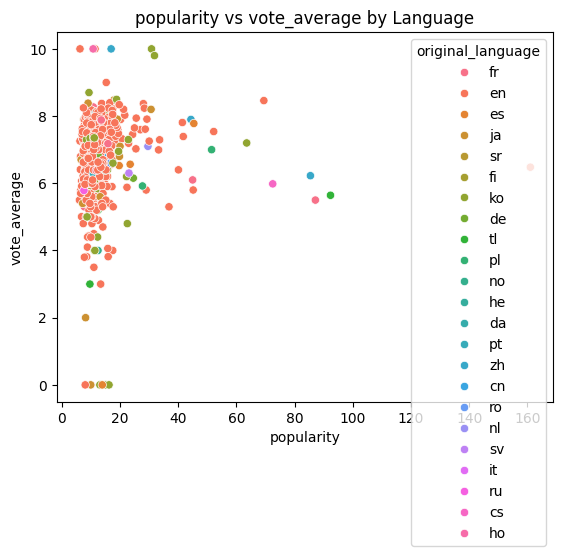

In [21]:
# popularity vs vote_average
group_and_plot(df, group_col="original_language", 
               value_cols=["popularity", "vote_average"], 
               kind="scatter", 
               title="popularity vs vote_average by Language")

**Nhận xét popularity và vote_average**
- Phần lớn các bộ phim trong dữ liệu có mức độ phổ biến (popularity) tập trung trong khoảng dưới 20.000, trong khi số phim đạt mức phổ biến trên 60.000 là rất ít. Điều này cho thấy chỉ một số ít phim có thể tiếp cận rộng rãi khán giả toàn cầu.
- Nhìn chung, phim có mức độ phổ biến cao thường đi kèm với điểm đánh giá trung bình khá ổn định, dao động từ 6 đến 8. Tuy nhiên, vẫn tồn tại ngoại lệ đáng chú ý:
    + Một số phim có popularity rất thấp (~10.000) nhưng lại đạt điểm đánh giá rất cao (gần 9 hoặc tuyệt đối).
    + Ngược lại, một vài phim có popularity cực cao (trên 90.000, thậm chí 161.000, là cao nhất trong dữ liệu) lại       chỉ nhận được điểm đánh giá khoảng 6.
- Điều này cho thấy rằng mức độ phổ biến không đồng nghĩa với chất lượng nội dung hoặc sự hài lòng từ khán giả. Một bộ phim được nhiều người quan tâm (popularity cao) có thể là do hiệu ứng truyền thông, thương hiệu lớn hoặc dàn diễn viên nổi tiếng, nhưng không đảm bảo sẽ nhận được đánh giá tích cực từ người xem.

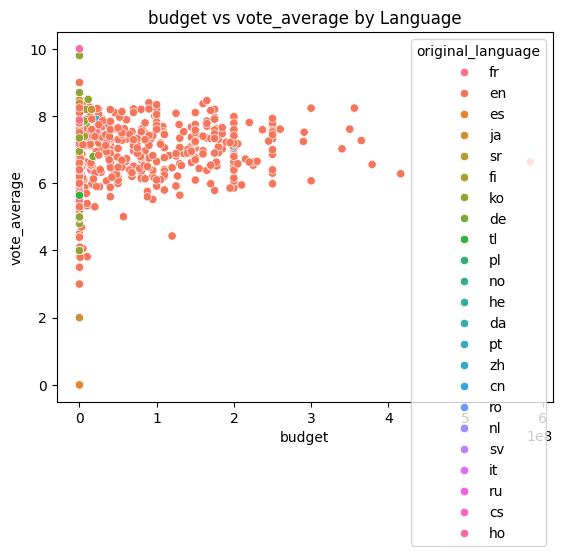

In [22]:
# budget vs vote_average
group_and_plot(df, group_col="original_language", 
               value_cols=["budget", "vote_average"], 
               kind="scatter", 
               title="budget vs vote_average by Language")

**Nhận xét budget và vote_average**
- Phần lớn các bộ phim trong dữ liệu có ngân sách sản xuất dưới 100 triệu USD, trong đó đa số rơi vào mức 30–70 triệu USD. Các bộ phim có ngân sách trên 300 triệu USD là rất hiếm, cho thấy chỉ một số ít phim đạt mức đầu tư cực lớn.
- Nhìn chung, phim có ngân sách càng cao thường đạt điểm đánh giá trung bình ở mức khá ổn, dao động chủ yếu trong khoảng 6 đến 8 điểm. Tuy nhiên, điều này không phải lúc nào cũng đúng tuyệt đối.
- Một số trường hợp ngoại lệ đáng chú ý:
    + Có phim được đầu tư với ngân sách gần 600 triệu USD, nhưng điểm đánh giá chỉ khoảng 6.8, tức chưa đạt mức          xuất sắc.
    + Ngược lại, một số phim với ngân sách khiêm tốn, dưới 20 triệu USD, lại đạt được điểm đánh giá rất cao từ           khán giả toàn cầu, cho thấy sự công nhận về nội dung hoặc nghệ thuật bất chấp quy mô tài chính.
- Những quan sát này cho thấy rằng: ngân sách lớn không đảm bảo chất lượng nội dung tốt hay được đánh giá cao. Sự thành công trong mắt khán giả có thể đến từ ý tưởng sáng tạo, kịch bản xuất sắc, thông điệp cảm xúc, hoặc sự đổi mới trong cách thể hiện, thay vì chỉ nằm ở mức độ đầu tư.

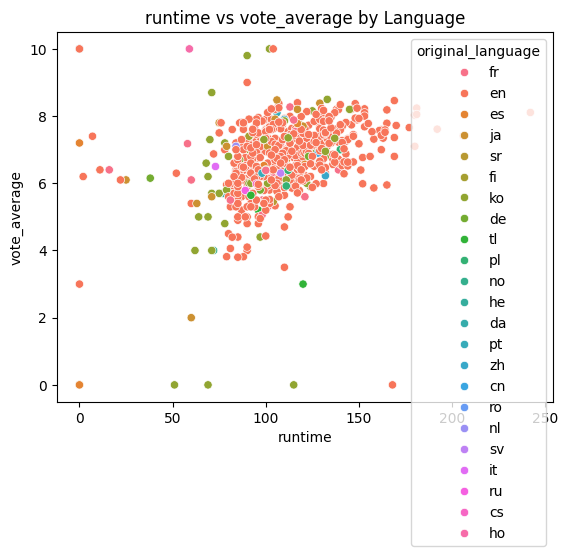

In [23]:
# runtime vs vote_average
group_and_plot(df, group_col="original_language", 
               value_cols=["runtime", "vote_average"], 
               kind="scatter", 
               title="runtime vs vote_average by Language")

**Nhận xét runtime và vote_average**
- Phần lớn các bộ phim trong tập dữ liệu có thời lượng dao động từ 80 đến 150 phút, trong đó mật độ dày nhất rơi vào khoảng 90 đến 120 phút – được xem là độ dài tiêu chuẩn trong điện ảnh. Dữ liệu phân bố có xu hướng rời rạc dần ở hai đầu, tức là ít phim có thời lượng quá ngắn (<30 phút) hoặc quá dài (>180 phút).
- Nhìn chung, điểm đánh giá trung bình (vote_average) có xu hướng tăng nhẹ theo thời lượng, đặc biệt là từ khoảng 90 đến 150 phút. Tuy nhiên, sự tăng này không tuyệt đối, và tồn tại một số ngoại lệ đáng chú ý:
    + Một số phim có thời lượng rất dài (gần 250 phút) đạt điểm đánh giá khá cao (~8.1), cho thấy nội dung dài           không làm giảm sự hấp dẫn nếu được đầu tư đúng cách.
    + Ngược lại, có những phim rất ngắn (dưới 10 phút) nhưng vẫn đạt điểm đánh giá tuyệt đối từ người xem, chứng         tỏ thời lượng ngắn không làm giảm chất lượng nếu nội dung đủ súc tích, sáng tạo và truyền tải thông điệp tốt.
- Thời lượng phim không tỷ lệ thuận tuyệt đối với điểm đánh giá. Mặc dù thời lượng lý tưởng thường rơi vào khoảng 90–120 phút, nhưng chính chất lượng nội dung, cách kể chuyện và cảm xúc mang lại mới là yếu tố quan trọng quyết định mức độ đánh giá từ khán giả.
- Những phim ngắn nhưng đạt điểm cao cho thấy tiềm năng của phim ngắn nghệ thuật, phim ngắn độc lập, đặc biệt trong các liên hoan phim, nền tảng streaming, hoặc các thị trường mới nổi như Việt Nam.

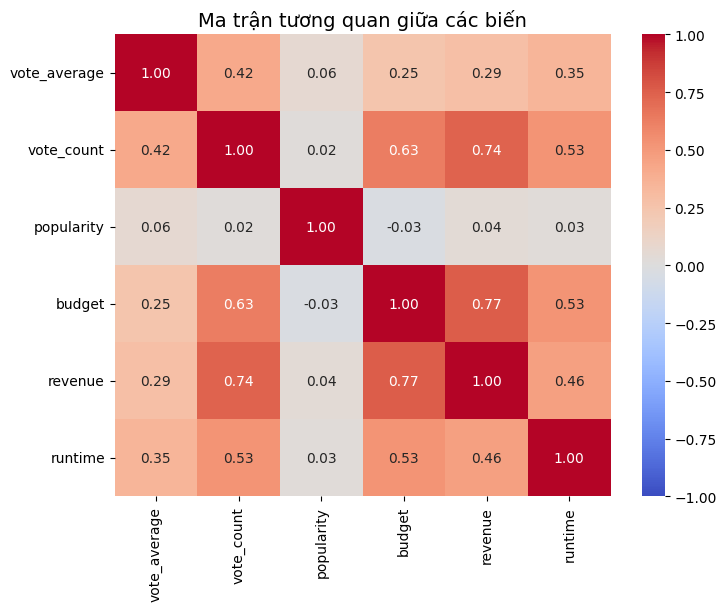

In [6]:
# 2.2.2 Tính hệ số tương quan (correlation matrix) giữa các biến.
import matplotlib.pyplot as plt
import seaborn as sns
#Chọn các cột numeric
numeric_cols = ["vote_average", "vote_count", "popularity", "budget", "revenue", "runtime"]

#Tính ma trận tương quan
corr = df[numeric_cols].corr()

#Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Ma trận tương quan giữa các biến", fontsize=14)
plt.show()

**Nhận xét**:
- Nhìn chung, ma trận tương quan biểu diễn mức độ tương quan giữa các biến đa số thuộc mức khá (dao động từ 0.3 đến 0.5). Ngân sách (budget) và doanh thu (revenue) có hệ số tương quan cao nhất là 0.77, thể hiện mối liên hệ mạnh mẽ giữa hai biến này. Điều này cho thấy rằng những bộ phim có mức đầu tư cao thường thu về doanh thu lớn. Tuy nhiên, mối quan hệ này không hoàn toàn tuyệt đối, vì vẫn có những phim được đầu tư lớn nhưng không đạt doanh thu như kỳ vọng.
- Mối tương quan thấp nhất nằm giữa ngân sách (budget) và mức độ phổ biến (popularity) với hệ số -0.03, gần như không có tương quan. Điều này gợi ý rằng mức độ phổ biến của phim không phụ thuộc nhiều vào ngân sách, mà có thể bị ảnh hưởng bởi các yếu tố khác như: nội dung, thời điểm phát hành, chiến dịch quảng bá, thể loại phim, hay dàn diễn viên.
- Ngoài ra, vẫn còn có những mối tương quan đáng chú ý như:
   + Số lượt đánh giá (vote_count) và doanh thu (revenue) có hệ số tương quan 0.74, ở mức tương đối mạnh. Điều này cho thấy rằng những bộ phim thu hút được nhiều lượt đánh giá từ khán giả thường cũng đạt doanh thu cao – có thể do chúng được quan tâm rộng rãi, phát hành ở nhiều quốc gia hoặc có chiến dịch marketing hiệu quả.
   + Vote_count cũng có mối tương quan vừa phải với ngân sách (0.63) và runtime (0.53). Điều này cho thấy những bộ phim được đầu tư nhiều và có thời lượng dài hơn thường thu hút được nhiều đánh giá hơn từ khán giả.
   + Vote_average (điểm đánh giá trung bình) có tương quan trung bình - yếu với các biến còn lại (dao động từ 0.25 đến 0.42), điều này cho thấy điểm đánh giá không hoàn toàn phụ thuộc vào doanh thu, ngân sách hay mức độ phổ biến – phản ánh rằng chất lượng cảm nhận của người xem là yếu tố độc lập.
  

In [43]:
# 2.2.3 So sánh sự khác biệt giữa phim toàn cầu và phim phát hành tại Việt Nam.
import clean_data

# Đọc dữ liệu
df_global = clean_data.DocFile('../src/movies_2009_2023.csv')
df_vn = clean_data.DocFile('../src/movies_vietnam_release.csv')

# Đổi kiểu ngày phát hành
df_global['release_date'] = pd.to_datetime(df_global['release_date'], format='%m/%d/%Y', errors='coerce')
df_vn['release_date'] = pd.to_datetime(df_vn['release_date'], errors='coerce')

# Thêm cột 'region' để phân biệt nguồn gốc
df_global["region"] = "global"
df_vn["region"] = "vietnam"

# Gộp lại thành một bảng duy nhất
df_all = pd.concat([df_global, df_vn], ignore_index=True)

# Xử lý nếu có dữ liệu thiếu (null)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1204 non-null   int64         
 1   title              1204 non-null   object        
 2   release_date       1204 non-null   datetime64[ns]
 3   vote_average       1204 non-null   float64       
 4   vote_count         1204 non-null   int64         
 5   popularity         1204 non-null   float64       
 6   original_language  1204 non-null   object        
 7   budget             1204 non-null   int64         
 8   revenue            1204 non-null   int64         
 9   runtime            1204 non-null   int64         
 10  status             1204 non-null   object        
 11  region             1204 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 113.0+ KB


In [45]:
# 2.2.3a. So sánh chỉ số trung bình
gb_region = df_all.groupby("region")[["vote_average", "vote_count", "budget", "revenue", "runtime", "popularity"]].mean()

print(gb_region)

         vote_average   vote_count        budget       revenue     runtime  \
region                                                                       
global       6.686365  6379.650000  6.710019e+07  2.844058e+08  108.258333   
vietnam      6.903816  5511.324503  7.483584e+07  2.610421e+08  114.261589   

         popularity  
region               
global    13.506734  
vietnam    8.297472  


**Nhận xét**: hầu hết giá trị trung bình giữa 2 khu vực thế giới và Việt Nam không chênh lệch nhau quá lớn.
- Điểm đánh giá trung bình (vote_count):
  + Việt Nam: ~6.9, thế giới: 6.69
  + Phim được phát hành tại Việt Nam được đánh giá cao hơn một chút
  + Điều này có thể xuất phát từ việc các phim phát hành ở Việt Nam được chọn lọc rất kỹ lưỡng từ các thị trường lớn
- Số lượt đánh giá (vote_count):
  + Việt Nam: ~5511.32, thế giới: ~6379.65
  + Mức độ chênh lệch không quá lớn, thế giới gấp khoảng 1,16 lần. Cho thấy các phim tại Việt Nam vẫn nhận được sự quan tâm đáng kể, dù thấp hơn một chút
- Ngân sách (budget):
  + Việt Nam: ~74.8 triệu USD, thế giới: ~67.1 triệu USD
  + Khá bất ngờ khi phim phát hành tại Việt Nam có ngân sách cao hơn phim quốc tế một chút
  + Tuy nhiên, rất có thể con số này bị ảnh hưởng của một vài bộ phim bom tấn (phim cần ngân sách cực kì cao), khiên trung bình bị kéo lên
- Doanh thu (revenue):
  + Việt Nam: ~261 triệu USD, thế giới: ~284 triệu USD
  + Phim quốc tế mặc dù có ngân sách đầu tư trung bình thấp hơn Việt Nam, nhưng thành công về mặt doanh thu của những bộ phim đó mang lại lại nhiều hơn phim Việt Nam. Rất có thể phim quốc tế được marketing, ngôn ngữ đến với nhiều quốc gia hơn
  + Khả năng sinh lời (ROI) của phim phát hành tại Việt Nam có thể sẽ thấp hơn
- Thời lượng phim (runtime):
  + Việt Nam: ~114 phút, thế giới: ~108 phút
  + Phim phát hành tại Việt Nam có thời lượng công chiếu dài hơn ~6 phút
  + Có thể phản ánh xu hướng ưu tiên chiếu các phim dài, đầu tư hơn, hoặc ít bị cắt chỉnh so với trước
- Mức độ phổ biến (Popularity):
  + Đây là sự chênh lệch rõ rệt nhất trong bảng:
  + Việt Nam: ~8.297, thế giới: 13.507
  + Điều này cho thấy thị trường Việt Nam hiện vẫn còn khiêm tốn về mực độ quan tâm/lan tỏa của các bộ phim
  + Một phần có thể do: quy mô thị trường nhỏ, số lượng nên tảng trực tuyến, mạng xã hội, hoặc các chiến dịch marketing quốc tế chưa đủ mạnh tại Việt Nam

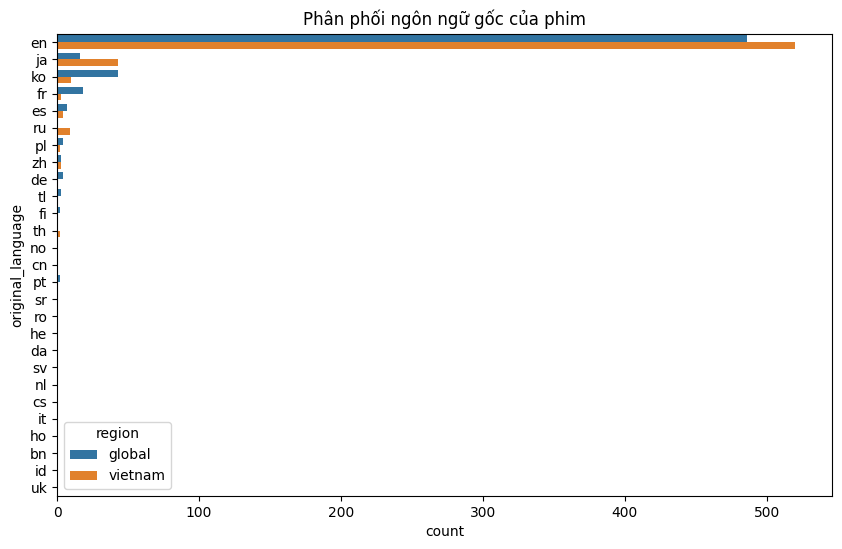

In [46]:
# 2.2.3b. So sánh theo ngôn ngữ
plt.figure(figsize=(10,6))
sns.countplot(data=df_all, y="original_language", hue="region", order=df_all["original_language"].value_counts().index)
plt.title("Phân phối ngôn ngữ gốc của phim")
plt.show()

**Nhận xét**: 
1. Tiếng Anh (en) vẫn chiếm ưu thế vượt trội trong cả 2 nhóm phim:
- Đây là ngôn ngữ chính được sử dụng trong phần lớn các bộ phim toàn cầu và phim phát hành tại Việt Nam.
- Điều này phản ánh vị trí thống trị của tiếng Anh trong ngành công nghiệp phim ảnh thế giới, cũng như xu hướng lựa chọn phim tiếng Anh làm phim phát hành tại Việt Nam.

2. Tiếng Anh ở phim Việt Nam còn phổ biến hơn một chút so với toàn cầu:
- Số lượng phim tiếng Anh phát hành ở Việt Nam lớn hơn so với số lượng phim tiếng Anh trong dữ liệu toàn cầu.
- Điều này có thể do phần lớn phim phát hành tại Việt Nam là phim quốc tế, chủ yếu là Hollywood và các phim tiếng Anh.
  
3. Các ngôn ngữ khác như tiếng Nhật (ja), Hàn Quốc (ko), Pháp (fr) cũng có xuất hiện ở cả hai nhóm, tuy nhiên số lượng rất nhỏ so với tiếng Anh:
- Ngôn ngữ tiếng Nhật và Hàn Quốc chiếm một tỉ lệ nhất định, thể hiện sức ảnh hưởng của các nền điện ảnh Nhật Bản và Hàn Quốc trong khu vực và toàn cầu.
- Số lượng phim ngôn ngữ khác như tiếng Pháp, Tây Ban Nha, Nga, Trung Quốc,... rất ít, phản ánh rằng các phim được phát hành tại Việt Nam và trong dữ liệu toàn cầu chủ yếu tập trung vào một vài ngôn ngữ chính.

4. Ngôn ngữ đa dạng ở nhóm toàn cầu hơn so với nhóm phim phát hành tại Việt Nam:
- Ở nhóm toàn cầu, biểu đồ cho thấy xuất hiện nhiều ngôn ngữ nhỏ lẻ hơn, trong khi nhóm phim Việt Nam chủ yếu tập trung vào một vài ngôn ngữ chính, nhất là tiếng Anh.

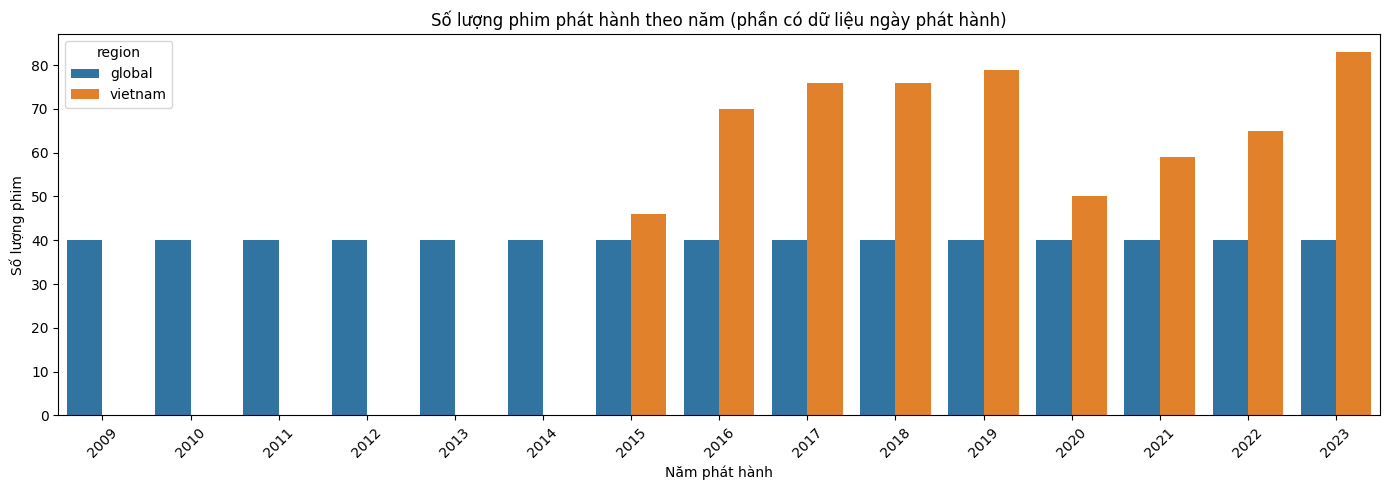

In [47]:
# 2.2.3c. So sánh phân phối thời gian phát hành
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo cột release_year từ release_date
df_all['release_year'] = df_all['release_date'].dt.year

#Chỉ dùng phần dữ liệu có release_year không null
df_with_year = df_all[df_all['release_year'].notnull()]

# Số lượng phim theo năm
plt.figure(figsize=(14,5))
sns.countplot(data=df_with_year, x="release_year", hue="region")
plt.title("Số lượng phim phát hành theo năm (phần có dữ liệu ngày phát hành)")
plt.xlabel('Năm phát hành')
plt.ylabel('Số lượng phim')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Nhận xét**:
- Phim toàn cầu (global): số lượng phát hành hằng năm khá ổn định, dao động quanh mức ~40 phim/năm trong suốt giai đoạn 2009–2023, không có biến động lớn.
- Phim phát hành tại Việt Nam (vietnam): chỉ bắt đầu xuất hiện dữ liệu từ năm 2015, và số lượng mỗi năm cao hơn rõ rệt so với toàn cầu (~50–80 phim/năm).
- Giai đoạn 2016–2019: Việt Nam đạt đỉnh (khoảng 80 phim/năm).
- 2020–2021: số phim tại Việt Nam giảm xuống (ảnh hưởng dịch Covid-19).
- 2022–2023: số lượng phục hồi, 2023 vượt mốc 80 phim → xu hướng tăng trưởng.

==> Kết luận:
- Toàn cầu: ổn định, không tăng mạnh.
- Việt Nam: tăng nhanh từ 2015, cao hơn toàn cầu về số lượng phim phát hành, chịu ảnh hưởng dịch nhưng sau đó phục hồi và tăng trưởng mạnh.

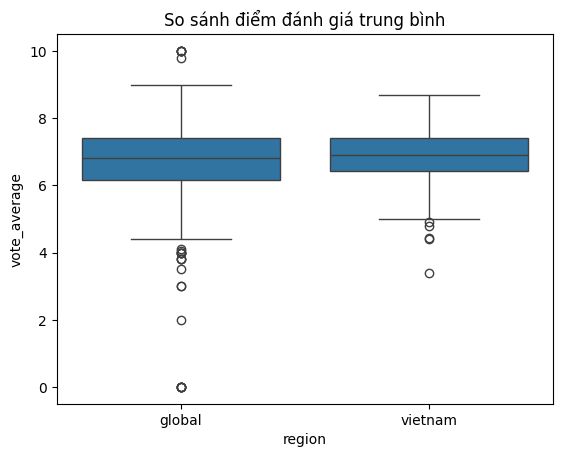

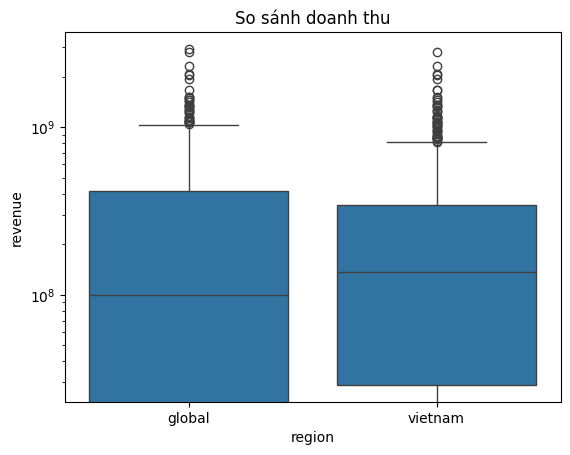

In [32]:
# 2.2.3d. Trực quan hóa phân phối chỉ số (Boxplot)
# So sánh điểm đánh giáA
sns.boxplot(data=df_all, x="region", y="vote_average")
plt.title("So sánh điểm đánh giá trung bình")
plt.show()

# So sánh doanh thu
sns.boxplot(data=df_all, x="region", y="revenue")
plt.title("So sánh doanh thu")
plt.yscale('log')  # nếu revenue có giá trị rất lớn
plt.show()


**Nhận xét**
1. So sánh điểm đánh giá trung bình (vote_average):
- Cả hai nhóm global và vietnam đều có phân phối khá tương đồng, trung vị (median) nằm quanh mức 6.5–7.0 điểm.
- Độ trải dữ liệu (IQR) cũng gần giống nhau → cho thấy chất lượng phim phát hành toàn cầu và tại Việt Nam về cơ bản không chênh lệch nhiều.
- Tuy nhiên:
    + Ở nhóm global có nhiều outlier (phim điểm cực thấp ~0–2).
    + Ở nhóm vietnam ít outlier điểm thấp hơn. Điều này có thể do phim phát hành ở Việt Nam đã được chọn lọc phần nào, hạn chế các phim quá kém chất lượng.

2. So sánh doanh thu (revenue):
- Biểu đồ dùng thang log nên dễ thấy hơn.
- Trung vị doanh thu phim toàn cầu và phim phát hành ở Việt Nam khá gần nhau, rơi vào khoảng 10^8 (100 triệu USD).
- Khoảng biến thiên (IQR) của global rộng hơn, nghĩa là doanh thu phim toàn cầu đa dạng hơn.
- Cả hai nhóm đều có nhiều outlier với doanh thu cực cao (trên 10^9 USD).
- Nhìn chung, phim phát hành ở Việt Nam có doanh thu trung bình không khác biệt đáng kể so với toàn cầu, nhưng phạm vi doanh thu (spread) hẹp hơn một chút.

==> Kết luận: 
- Điểm đánh giá: không khác biệt nhiều, nhưng phim phát hành tại Việt Nam có ít phim điểm quá thấp hơn.
- Doanh thu: mức trung vị tương đương toàn cầu, nhưng sự đa dạng và biên độ doanh thu toàn cầu rộng hơn so với Việt Nam.